<h1><center>CMPE 462 - Project 3 <br>Implementing K-Means & PCA<br>Due: June 14, 2020, 23:59</center></h1>

- **Student ID1:** **2015400162**
- **Student ID2:** **2015400159**

In this project, you are going to implement two unsupervised learning techniques. In the first task, you are asked to implement **k-means clustering** algorithm using the data provided in `kmeans_data.zip`. In the second task, you need to implement **PCA** and apply dimensionality reduction on the data provided in `USPS.mat`. 

# (50 pts) Task 1: K-Means Clustering

Please download `kmeans_data.zip`. In this problem, ground truth cluster assignments are given in `labels.npy`. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("kmeans_data/data.npy")
labels = np.load("kmeans_data/label.npy")


## (10 pts) Task 1.1: Plot Clusters

Plot the data using scatter plot. Assign different colors to different classes.

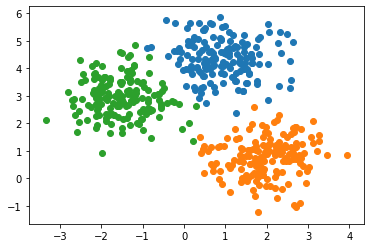

In [2]:
plt.scatter(data[np.where(labels==0)][:,0], data[np.where(labels==0)][:,1])
plt.scatter(data[np.where(labels==1)][:,0], data[np.where(labels==1)][:,1])
plt.scatter(data[np.where(labels==2)][:,0], data[np.where(labels==2)][:,1])

## (30 pts) Task 1.2: K-Means Implementation

Implement k-means clustering algorithm by yourself using the number of iterations as the stopping condition. You can use built-in functions only for side-tasks such as norm computation, minimum element search and mean calculation, not for the clustering itself.

In [3]:
def Kmeans(itrCount,K,data,numpySeedNumber):
    np.random.seed(numpySeedNumber) 
    initials=[data[int(rand)] for rand in np.floor(data.shape[0]*np.random.rand(K))]
    
    clusters_mean=initials
    itr=0
    while itr<itrCount:
        itr+=1
        clusters=[[] for i in range(K)]
        for x in data:
            distances=distanceToClusters(x,clusters_mean,K)
            clusterIndex=distances.index(min(distances))
            clusters[clusterIndex].append(x)
        clusters_mean=computeCentroids(clusters)
    return clusters


def distanceToClusters(x,clusters_mean,K):
    distances=[0 for i in range(K)]
    for i in range(K):
        distVec=np.subtract(x, clusters_mean[i])
        distances[i]=distVec.dot(distVec)
    return distances


def computeCentroids(clusters):
    return [np.mean(np.array(cluster), axis=0) for cluster in clusters]


def drawClusters(clusters):
    for cluster in clusters:
        plt.scatter(np.array(cluster)[:,0], np.array(cluster)[:,1])

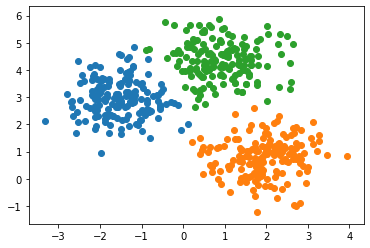

In [4]:
clusters=Kmeans(itrCount=8,K=3,data=data,numpySeedNumber=1)
drawClusters(clusters)

## (10 pts) Taks 1.3: Evaluation

Run k-means $9$ times with number of iterations $(N)$ $= \{1, 2, ..., 9\}$. Plot the final clustering assignments as a scatter plot for each run as 3x3 `matplotlib subplot`. Visually investigate the effect of the number of iterations on obtaining the optimal clustering and find the convergence point by comparing the plots with the one in Task 1.1. If the model does not converge at $9$ iterations, you can select $9$ other $N$ to effectively show the progress of the clustering.

For a fair comparison, start each run with the same initial random assignments. You can use `np.random.seed(1)` to this purpose.

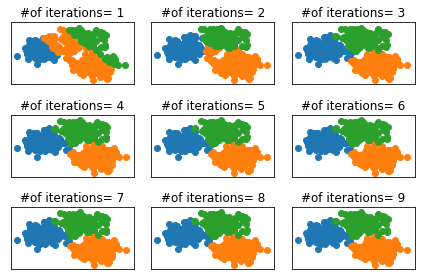

In [5]:
clusters_List=[Kmeans(itrCount=itrCount,K=3,data=data,numpySeedNumber=1) for itrCount in range(1,10)]
f = plt.figure()
for i in range(len(clusters_List)):
    f.add_subplot(3, 3, i+1)
    drawClusters(clusters_List[i])
    plt.title("#of iterations= "+str(i+1))
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
plt.tight_layout()

# (50 pts) Task 2: Principal Component Analysis (PCA)

Please load the whole dataset in `USPS.mat` using the function `loadmat` in `Scipy.io`. The matrix $A$ contains all the images of size 16 by 16. Each of the 3000 rows in $A$ corresponds to the image of one handwritten digit (between 0 and 9).

In [6]:
import scipy.io

data = scipy.io.loadmat("USPS.mat")


## (30 pts) Task 2.1: PCA Implementation

Implement PCA and apply it to the data using $d = 50, 100, 200, 300$ principal components. You are not allowed to use an existing implementation. You can use existing packages for eigen-decomposition. **Do not forget to standardize the data before eigen-decomposition.**

In [7]:
from scipy import stats,linalg

def findPComponents(d):
    X=stats.zscore(data["A"]) #standardize the data
    S=(1/len(X))*np.dot(X.T,X) #covariance matrix 
    V=linalg.eig(S) #get eigenvalues and eigenvectors
    sortedEigenVals=np.sort(V[0]) #sort eigenvalues
    eVecs=np.empty([d, 256])  #selected eigenVectors
    
    for i in range(d):  #take first d eigenVectors
        eVal=sortedEigenVals[i]
        ind=np.where(V[0] == eVal)
        eVecs[i]=V[1][ind]
        
    return eVecs #since we constructed eVecs row based, returned matrix corresponds to G.tranpose



In [8]:
G_50=findPComponents(50) #the transformation matrix G
G_100=findPComponents(100)
G_200=findPComponents(200)
G_256=findPComponents(256)

In [9]:
def applyPCA(G):
    c_imgs=np.dot(G,data["A"].T)
    return c_imgs

compressed_imgs=applyPCA(G_200)

## (15 pts) Task 2.2: Image Reconstruction

Reconstruct images using the selected principal components from Task 2.1

In [10]:
def reConstruct(G,c_imgs):
    reConstImgs=np.dot(G.T,c_imgs)
    #print(reConstImgs.shape)
    return reConstImgs


In [11]:
reConstImgs=reConstruct(G=G_200,c_imgs=compressed_imgs)

## (5 pts) Task 2.3: Evaluation

Visualize the reconstructed images for the images at indices $i = 0, 500, 1000, 2000$ for $d=50, 100, 200, 300$. Create a 4x5 subplot where the rows correspond to images at each index, first four columns correspond to reconstructed images using each $d$ and the last column is the raw image, i.e. before PCA. Comment on your results.

In [12]:
def show(indexes,reConstImgs):
    f = plt.figure()
    for i in range(len(indexes)):
        f.add_subplot(1,len(indexes), i+1)
        plt.title("i =  " + str(indexes[i]))
        plt.gca().axes.get_yaxis().set_visible(False)
        plt.gca().axes.get_xaxis().set_visible(False)
        plt.imshow(np.reshape(reConstImgs[:,indexes[i]], (16,16)), cmap='gray_r')
    plt.show()
    
    #plt.tight_layout()

d = 50


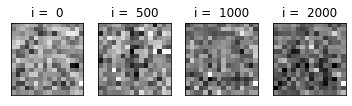

d = 100


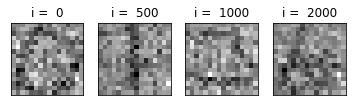

d = 200


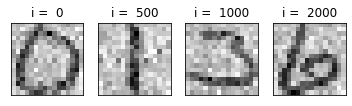

d = 256


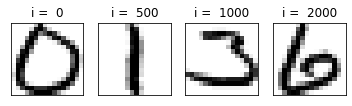

In [13]:
print("d = 50")
compressed_imgs=applyPCA(G_50)
reConstImgs=reConstruct(G=G_50,c_imgs=compressed_imgs)
show(indexes=[0,500,1000,2000],reConstImgs=reConstImgs)

print("d = 100")
compressed_imgs=applyPCA(G_100)
reConstImgs=reConstruct(G=G_100,c_imgs=compressed_imgs)
show(indexes=[0,500,1000,2000],reConstImgs=reConstImgs)

print("d = 200")
compressed_imgs=applyPCA(G_200)
reConstImgs=reConstruct(G=G_200,c_imgs=compressed_imgs)
show(indexes=[0,500,1000,2000],reConstImgs=reConstImgs)

print("d = 256")
compressed_imgs=applyPCA(G_256)
reConstImgs=reConstruct(G=G_256,c_imgs=compressed_imgs)
show(indexes=[0,500,1000,2000],reConstImgs=reConstImgs)